<a href="https://colab.research.google.com/github/GriffsKode/griffskode.github.io/blob/main/portfolio/BinomialCDF/PhysiciansSchedule_BinomCDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### This example considers a physician who's workload is 30 patients per day. It is estimated that 25% of patients fail to show up to their appointments leading to loss of revenue for the physician.
###### This example calculates the ideal number of patient to schedule per day.
The first cell imports libraries, and defines variables to simply calculate the number  of appointments that should be scheduled if only 75% of scheduled patients show up.

In [12]:
# import libraries scipy, stats, and binomial distribution
import scipy
from scipy.stats import binom
import matplotlib.pyplot as plt

# Set 'workload' to the maximum number of patients per day
workload = 30

# Set 'prob' as the percentage of patients that show up
prob = 0.75

# Set 'x' as the answer for max num of patients per day dividied by the probability
x = workload / prob
print(x, "is the number of patients that should be scheduled (linear approach) assuming only 75% of patients will show up.")

40.0 is the number of patients that should be scheduled (linear approach) assuming only 75% of patients will show up.


###### A binomial distribution model uses historical data to assume 25% of patients do not show up for their appointments.

###### We will calculate the probability density function (binom.pmf()) similiar to a Cumulative Density Function a normal distribution. The pmf function creates a vector of pmf values.

###### We will plot the distribution of the calculated value we found for 'x' in the previous cell.

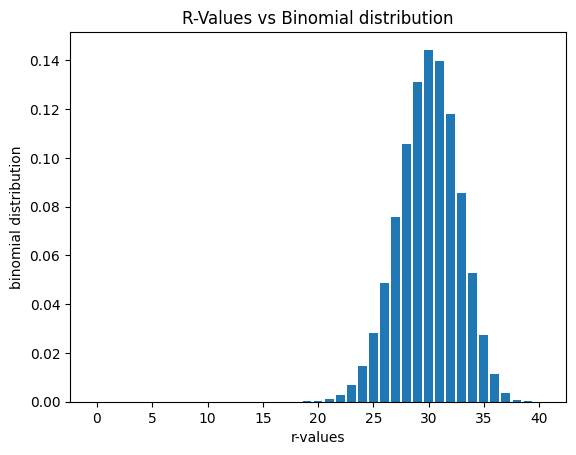

In [13]:
# Set the values of x and prob from cells above
x = 40
prob = 0.75

# Define a list of r values in the range of x+1
r_values = list(range(x + 1))

# Generate a binomial distribution (dist) using the generate the "dist" variable by calling the binom.pmf() function. This creates a list of pmf values
dist = binom.pmf(r_values, x, prob)

# Add title and axis names
plt.title('R-Values vs Binomial distribution')
plt.xlabel('r-values')
plt.ylabel('binomial distribution')

# Plot the binomial distribution with the r_values (x-axis) and dist (y-axis)
plots = plt.bar(r_values, dist)
xy = []
for plot in plots:
    xy.append(plot.get_xy())
plt.show()

In [14]:
# We will now set the linear prediction, workload, and probability to use the Cumulative distribution function to calculate the percentage of the time that
# the physician will be overbooked.
linearPrediction = 40
workload = 30
prob = 0.75

# We can calculate the percent of the time that the physician is overbooked by calculating 1-(D cdf()).
# Set the output to overworked variable
overworked = round((1 - binom.cdf(k = workload, n = linearPrediction, p = prob)), 4)
print('The cumulative distribution function calculates that',overworked,'% of the time the the physician will be overbooked given the inputs above.')

The cumulative distribution function calculates that 0.4395 % of the time the the physician will be overbooked given the inputs above.


###### The binomial ppf() function can be used to caclulate the number of appointments the physician should schedule if they want to limit the risk of having more than 30 appointments per day to 5%. Percent point function (ppf) is the inverse of cdf — percentiles

In [15]:
# Set workload to 30 apppointments per day and estimated 25% of appointments may cancel
workload =30
prob = 0.75

# Target number of overbooked patients
target = 0.05

# Set "total" = workload + ppf() -- hint: p = 1-prob
p = 1-prob
total = workload + binom.ppf(q = target ,n = workload ,p= 1 - prob,loc=0)
print(total, "appointments can be scheduled to limit the risk of having more than", workload, "appointments per day.")

34.0 appointments can be scheduled to limit the risk of having more than 30 appointments per day.
